In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
#임의의 분포를 만든다
X = np.random.normal(0,1,1000)

In [ ]:
Y = X * 1 + np.random.normal(0,1,1000)

#분포 출력
plt.scatter(X, Y)
plt.show()

In [ ]:
Y = np.random.normal(0,1,1000)

#분포 출력
plt.scatter(X, Y)
plt.show()

In [ ]:
Y = X * -1 + np.random.normal(0, 1,1000)

#분포 출력
plt.scatter(X, Y)
plt.show()

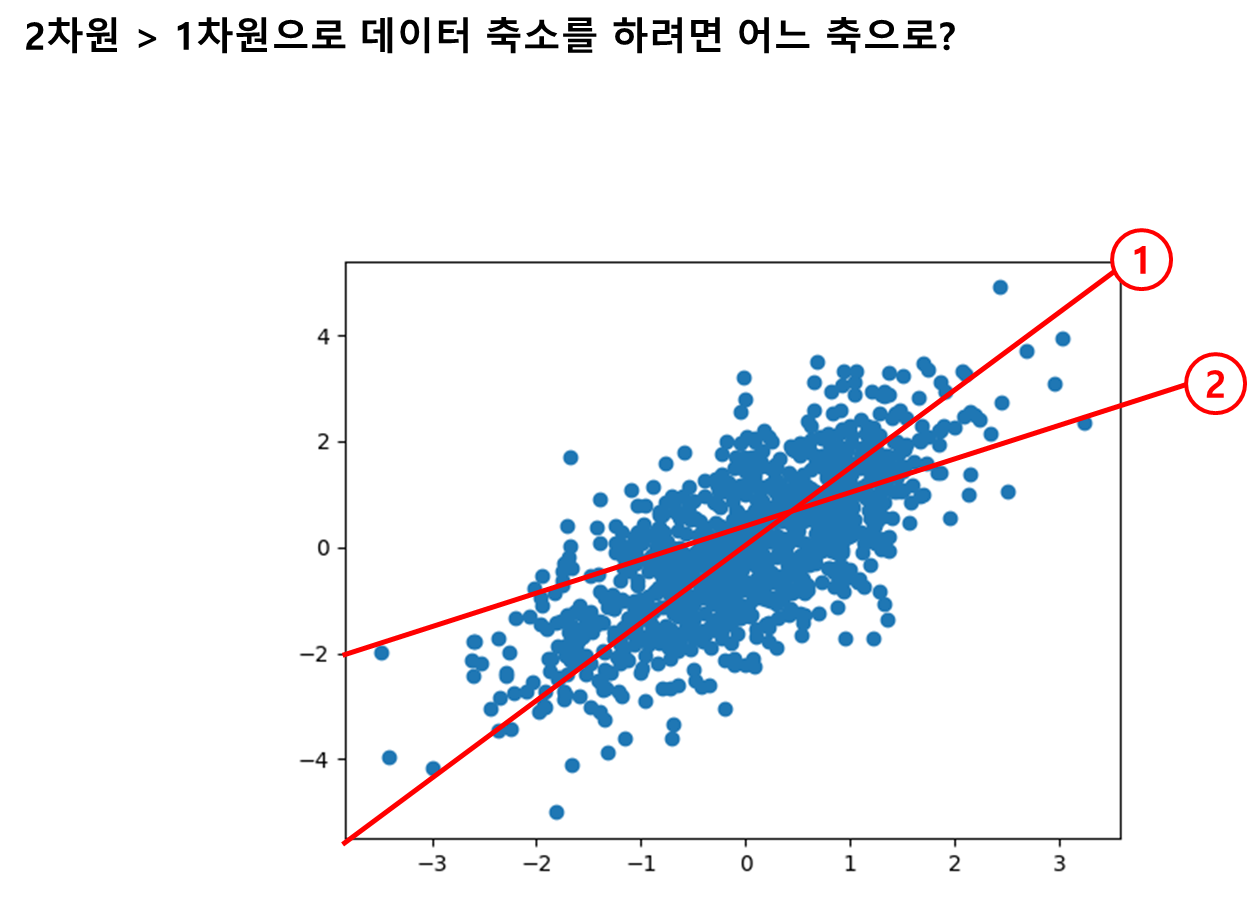

----

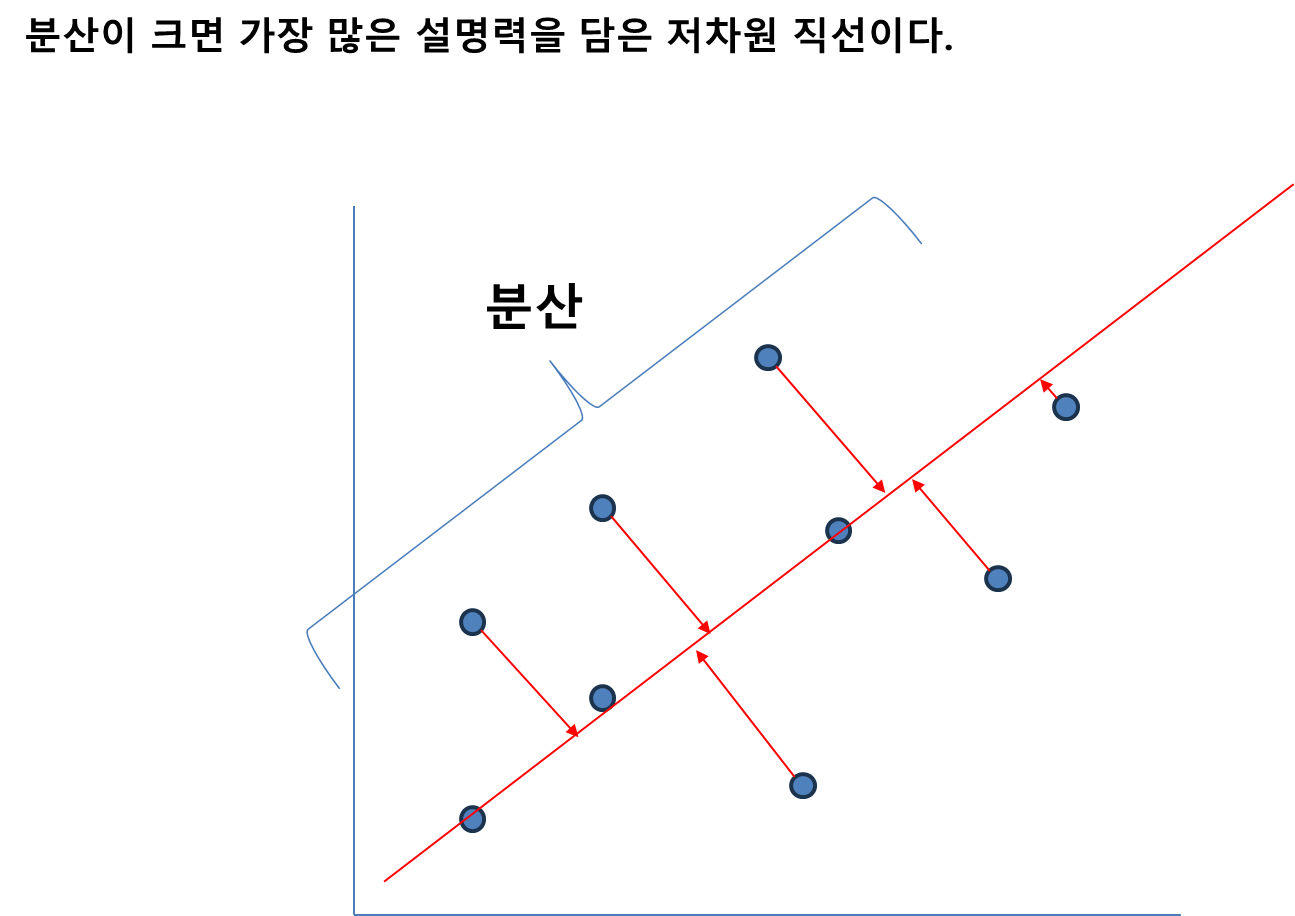

# **분산이 가장 큰 저차원 직선은 어떻게 구할까?**

----

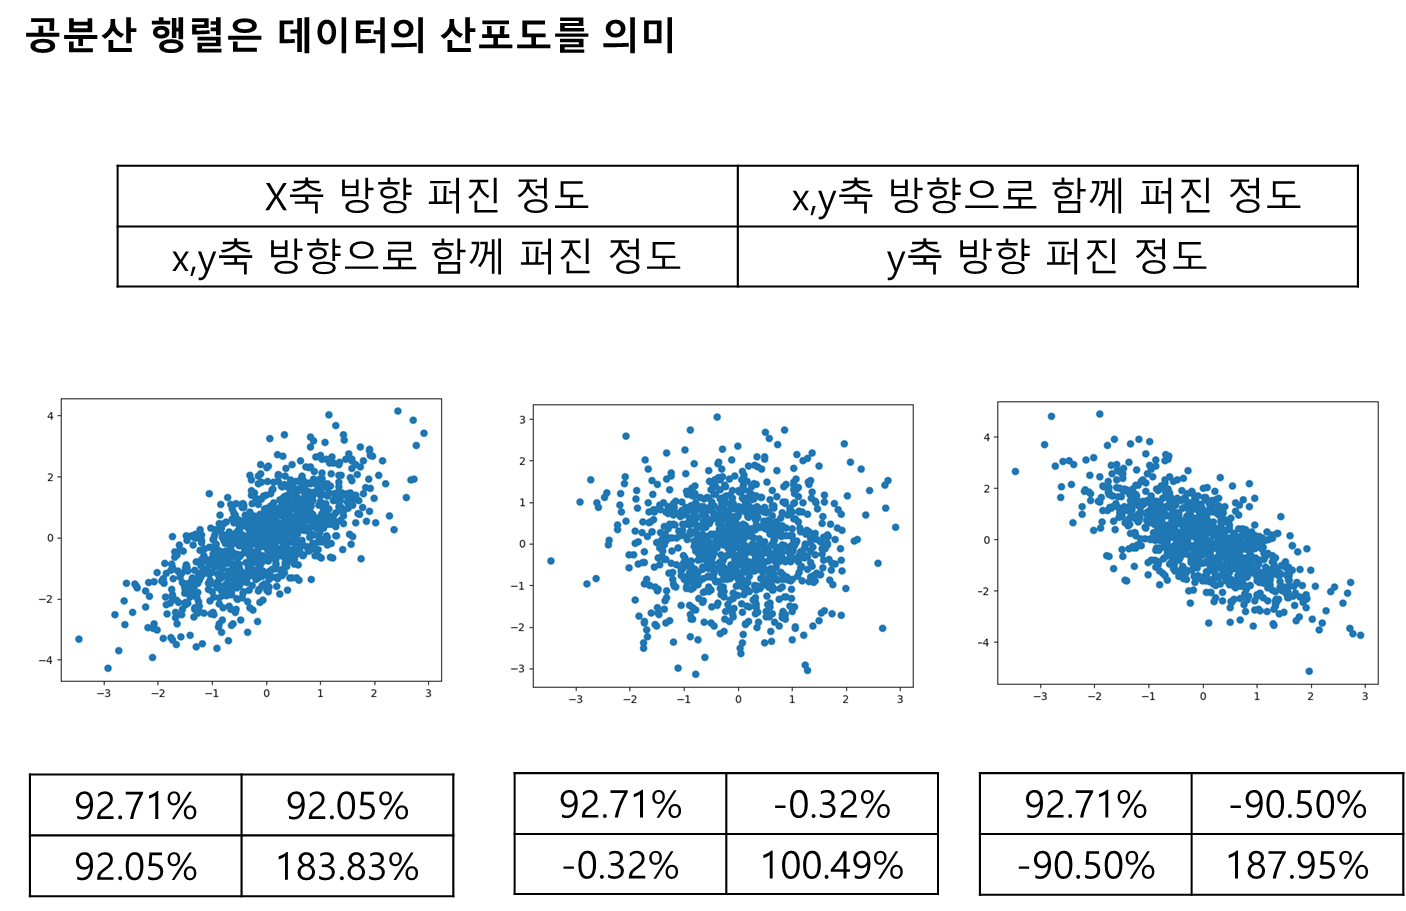

In [ ]:
#개별 분산 및 공분산을 계산한다.
공분산 = np.cov(X, Y)
print(공분산)

In [8]:
#공분산 행렬의 의미
균등좌표 = (np.arange(41) -20) * 0.1
균등좌표 = np.full([41,41], 균등좌표)
균등좌표 = np.concatenate([균등좌표[:,:, np.newaxis], 균등좌표.T[:,:, np.newaxis]], axis=2)

In [ ]:
#균등좌표계 출력
plt.scatter(균등좌표[:,:,0], 균등좌표[:,:,1],s=0.5)
plt.show()

In [ ]:
#공분산 행렬로 변환
변환좌표 = 균등좌표 @ 공분산

#균등좌표계 출력
plt.scatter(변환좌표[:,:,0], 변환좌표[:,:,1],s=0.5)
plt.show()

In [ ]:

#고유벡터
각도 = np.arange(360)
각도 = 각도 * np.pi / 180
각도_X = np.cos(각도)
각도_Y = np.sin(각도)
원래각도 = np.concatenate([각도_X[:,np.newaxis], 각도_Y[:,np.newaxis]], axis=1)

plt.figure(figsize=(6, 6))
plt.scatter(원래각도[:,0], 원래각도[:,1],s=0.5)
plt.scatter(0,0,s=20,marker='o', color='#000000')
plt.show()

In [ ]:

#공분산행렬로 변환한다.
행렬변환 = 원래각도 @ 공분산

plt.figure(figsize=(6, 6))
plt.scatter(행렬변환[:,0], 행렬변환[:,1],s=0.5)
plt.scatter(0,0,s=20,marker='o', color='#000000')
plt.show()


In [72]:
import numpy as np

def get_angle(vector):
  """Calculates the angle of a vector with respect to the x-axis."""
  x = vector[0]
  y = vector[1]
  angle = np.arctan2(y, x)
  return angle

# Calculate the angles for both datasets
original_angles = np.apply_along_axis(get_angle, 1, 원래각도)
transformed_angles = np.apply_along_axis(get_angle, 1, 행렬변환)

# Find the indices where the angles are equal (or very close)
tolerance = 0.04  # Define a small tolerance for floating-point comparisons
indices = np.where(np.isclose(original_angles, transformed_angles, atol=tolerance))

# Print the indices
print(indices)


(array([ 32, 119, 120, 121, 122, 123, 124, 212, 299, 300, 301, 302, 303,
       304]),)


In [ ]:

plt.figure(figsize=(6, 6))
plt.scatter(원래각도[:,0], 원래각도[:,1],s=0.5)
plt.scatter(원래각도[indices,0], 원래각도[indices,1],s=5, marker='X', color='#FF0000')
plt.scatter(0,0,s=20,marker='o', color='#000000')
plt.show()


In [ ]:

plt.figure(figsize=(6, 6))
plt.scatter(행렬변환[:,0], 행렬변환[:,1],s=0.5)
plt.scatter(행렬변환[indices,0], 행렬변환[indices,1],s=5, marker='X', color='#FF0000')
plt.scatter(0,0,s=20,marker='o', color='#000000')
plt.show()


In [ ]:

plt.figure(figsize=(10, 10))
plt.scatter(X, Y, alpha=0.2)
plt.scatter(행렬변환[:,0], 행렬변환[:,1],s=0.5, color='#00FF00')
plt.scatter(행렬변환[indices,0], 행렬변환[indices,1],s=20, marker='X', color='#FF0000')
plt.scatter(0,0,s=20,marker='o', color='#000000')
plt.show()

In [ ]:

from sklearn.decomposition import PCA
data = np.concatenate([X[:,np.newaxis],Y[:,np.newaxis]], axis=1)

pca = PCA(n_components = 2) # feature 변수 개수가 2개
pca.fit(data)

components = pca.components_
eigen_value = pca.explained_variance_

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


In [ ]:

plt.figure(figsize=(10, 10))
plt.scatter(X, Y, alpha=0.2)
plt.scatter(행렬변환[:,0], 행렬변환[:,1],s=0.5, color='#00FF00')
plt.scatter(행렬변환[indices,0], 행렬변환[indices,1],s=20, marker='X', color='#FF0000')
plt.scatter(0,0,s=20,marker='o', color='#000000')

x_end = components[0,0] * eigen_value[0]
y_end = components[0,1] * eigen_value[0]
plt.arrow(0, 0, x_end, y_end, head_width=0.1, head_length=0.2, fc='r', ec='r')


x_end = components[1,0] * eigen_value[1]
y_end = components[1,1] * eigen_value[1]
plt.arrow(0, 0, x_end, y_end, head_width=0.1, head_length=0.2, fc='r', ec='r')

plt.show()

In [ ]:

predict = pca.transform(data)
plt.scatter(predict[:,0], predict[:,1])
plt.show()

In [ ]:

pre2 = data @ pca.components_.T
plt.scatter(pre2[:,0], pre2[:,1])
plt.show()

In [ ]:
!wget "https://hycms.hanyang.ac.kr/index.php?module=xn_media_content2013&act=dispXn_media_content2013DownloadContent&content_id=66dd0aa51d289" -O "apt_real.csv"

In [ ]:
data = pd.read_csv('apt_real.csv', quotechar='"', sep=',', skiprows=15, encoding='cp949', dtype='str')
data.shape

In [ ]:
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',', '')
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')
data = data.rename(columns={'거래금액(만원)' : '거래가'})
data = data[data['거래가'] < 500000]

data = data.rename(columns={'전용면적(㎡)':'면적'})
data['면적'] = data['면적'].astype('float')

data['건축년도'] = data['건축년도'].astype(int)
data['연한'] = data['건축년도'].apply(lambda x : 2024 - x)

data.dtypes

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data['면적'].values, data['연한'].values, s=2, alpha=0.2)
plt.show()

In [ ]:
pca_data = np.concatenate([data['면적'].values[:,np.newaxis],data['연한'].values[:,np.newaxis]], axis=1)

pca = PCA(n_components = 2) # feature 변수 개수가 2개
pca.fit(pca_data)

components = pca.components_
eigen_value = pca.explained_variance_

print(pca.components_)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)


In [ ]:

plt.figure(figsize=(10, 10))
plt.scatter(data['면적'].values, data['연한'].values, s=2, alpha=0.2)
centroid = [np.mean(data['면적'].values),np.mean(data['연한'].values)]

plt.scatter(centroid[0], centroid[1],s=10,marker='o', color='#000000')

x_end = components[0,0] * np.sqrt(eigen_value[0])
y_end = components[0,1] * np.sqrt(eigen_value[0])
plt.arrow(centroid[0], centroid[1], centroid[0]+x_end, centroid[1]+y_end, head_width=0.1, head_length=0.2, fc='r', ec='r')


x_end = components[1,0] * np.sqrt(eigen_value[1])
y_end = components[1,1] * np.sqrt(eigen_value[1] )
plt.arrow(centroid[0], centroid[1], centroid[0]+x_end, centroid[1]+y_end, head_width=0.1, head_length=0.2, fc='r', ec='r')

plt.show()